In [2]:
import h5py
import numpy as np

with h5py.File(r"D:\Salome\Slp_cross_model\results\labels.v001.cross.007_Trial     4.analysis.h5", "r") as f:
    dset_names = list(f.keys())
    locations = f["tracks"][:].T
    node_names = [n.decode() for n in f["node_names"][:]]

print("===filename===")
print("D:\train_SLEAP_simple\labels.v001.000_DON011733-20230305.analysis.h5")
print()



print("===HDF5 datasets===")
print(dset_names)
print()

print("===locations data shape===")
print(locations.shape)
print()

print("===nodes===")
for i, name in enumerate(node_names):
    print(f"{i}: {name}")
print()

===filename===
D:	rain_SLEAP_simple\labels.v001.000_DON011733-20230305.analysis.h5

===HDF5 datasets===
['edge_inds', 'edge_names', 'instance_scores', 'labels_path', 'node_names', 'point_scores', 'provenance', 'track_names', 'track_occupancy', 'tracking_scores', 'tracks', 'video_ind', 'video_path']

===locations data shape===
(15044, 4, 2, 1)

===nodes===
0: center
1: front
2: left
3: right



In [3]:
CENTER_INDEX = 0
center_loc = locations[:, CENTER_INDEX, :, :]

## Find center and radius of circle

In [4]:
center_x = 634.0 
center_y = 677.0
radius = 464.83426

## Costruction and rotation of lines

### Original line equations

y1 = -0.00 * x + 677.00
a1 = 0 
b1 = 677.00

y2 = 1.73 * x + -421.12
a2 = 1.73
b2 = -421.12

y3 = -1.73 * x + 1775.12
a3 = -1.73
b3 = 1775.12

### Rotated line equation. Rotated around (634.0, 677.0).

y1 = 0.5773502691896384 * x + 310.9599293337763

y2 = 1948.7191084394267 * x + -1236078.708004072 

y3 = -0.5766662617226573 * x + 1043.3574098868085 

### Plot of data and lines

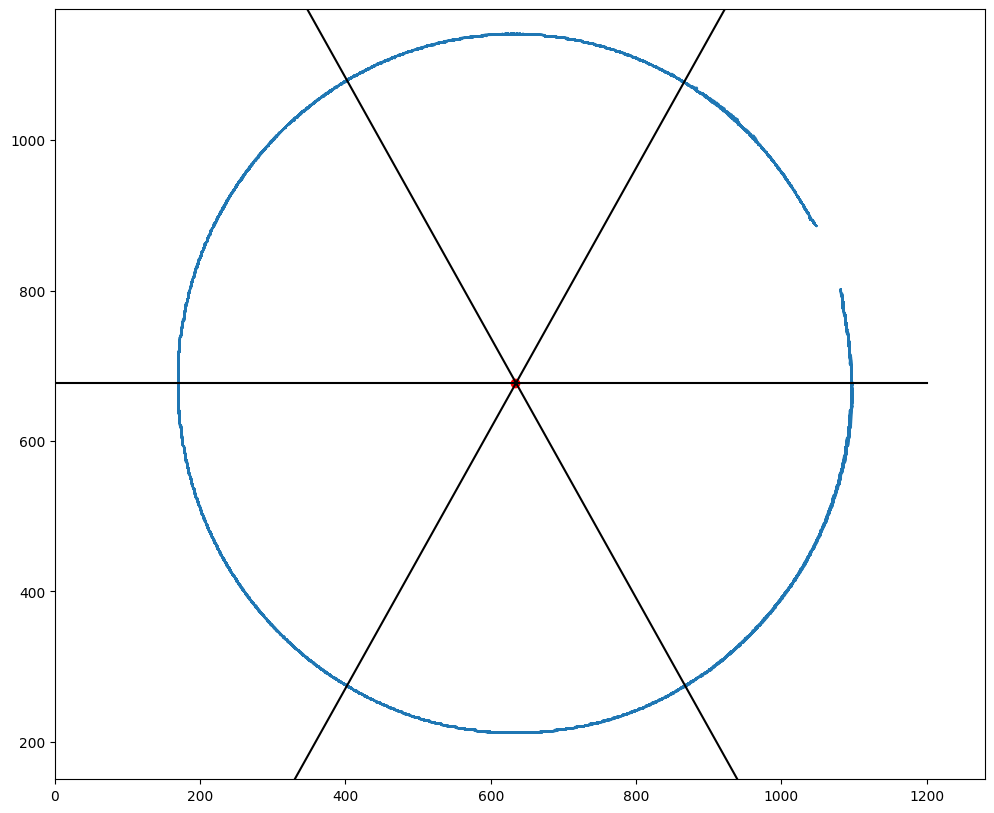

In [20]:
import matplotlib.pyplot as plt

locations.shape
plt.figure(figsize=(12,10))
# plot each body part
#for k in range(5):
	#
for k in [1]:
	loc = locations[:,k,:,0]
	
	# bp has dimensions: (90000,2)
	plt.plot(loc[:,0],
			 1200-loc[:,1],
			 )
			 
    


x = np.linspace(0, 1200, 100)
y1 = -0.00 * x + 677.00
y2 = 1.73 * x + -421.12
y3 = -1.73 * x + 1775.12


y_test1 = 0.5773502691896384 * x + 310.9599293337763
y_test2 = 1948.7191084394267 * x + -1236078.708004072  # as close to x = 634 as possible 
y_test3 = -0.5766662617226573 * x + 1043.3574098868085

plt.plot(center_x, center_y, 'ro')
plt.plot(x, y1, 'black') 
plt.plot(x, y2, 'black') 
plt.plot(x, y3, 'black') 
# plt.plot(x, y_test1, 'black') 
# plt.plot(x, y_test2, 'black') 
# plt.plot(x, y_test3, 'black') 


plt.gray()        
plt.xlim(0, 1280) #1280
plt.ylim(150, 1174) #1024 

plt.savefig('cross7_track_original_lines_center.png') 
plt.show()




## Results for one rotation (nan nan to nan nan)

### How many point are in each sector during one rotation? 

In [26]:

#two nanas are at 1040 and 2545 

sector1 = 0 
sector2 = 0 
sector3 = 0 
sector4 = 0 
sector5 = 0 
sector6 = 0

for i in range (1040, 2545):
    x_m = locations[i, 1, 0, 0]
    y_m = 1200-locations[i, 1, 1, 0]

    y1 = 0.5773502691896384 * x_m + 310.9599293337763
    y2 = 1948.7191084394267 * x_m + -1236078.708004072  # as close to x = 634 as possible 
    y3 = -0.5766662617226573 * x_m + 1043.3574098868085


    if x_m >= 634:
        if y1 <= y_m:
            sector3 += 1
        elif y3 <= y_m:
            sector4 += 1 
        else:
            sector5 += 1
    
    elif x_m < 634:
        if y1 >= y_m:
            sector6 += 1
        elif y3 >= y_m:
            sector1 += 1
        else:
            sector2 += 1
            
    #print (sector1, sector2, sector3, sector4, sector5, sector6)
    #print (x_m, y_m)
    
print("Sector 1 =", sector1)
print("Sector 2 =", sector2)
print("Sector 3 =", sector3)
print("Sector 4 =", sector4)
print("Sector 5 =", sector5)
print("Sector 6 =", sector6)

Sector 1 = 253
Sector 2 = 256
Sector 3 = 253
Sector 4 = 203
Sector 5 = 247
Sector 6 = 248


### Results for one rotation presented in a bar chart 

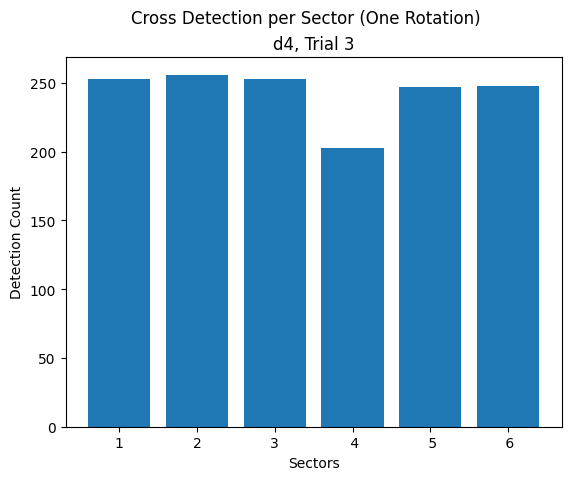

In [27]:
import matplotlib.pyplot as plt

# numbers for each sector are defined abvove

# Labels for the bars
labels = ['1', '2', '3', ' 4', ' 5', ' 6']

# Values for the bars
data = [sector1, sector2, sector3, sector4, sector5, sector6]

# Create a bar chart
plt.bar(labels, data)

# Add labels and title
plt.xlabel('Sectors')
plt.ylabel('Detection Count')
plt.suptitle("Cross Detection per Sector (One Rotation)")
plt.title("d4, Trial 3")


plt.savefig('cross7_rotation_bar_chart.png')
plt.show()

## Comment

Still not perfect but good enough for now. Less frames for sector 2 detected due to thing hiding the cross. 
Sectors 1, 3, 4, 5, 6, probably not completly identical due to equations. Sectors 1 + 5 and 2 + 3 are almost identical. 

## Results for entire video 7 

### How many per sector in whole video? 

In [28]:

#entire video, 15044 frames 

sector1 = 0 
sector2 = 0 
sector3 = 0 
sector4 = 0 
sector5 = 0 
sector6 = 0

for i in range (0, 15044):
    x_m = locations[i, 1, 0, 0]
    y_m = 1200-locations[i, 1, 1, 0]

    y1 = 0.5773502691896384 * x_m + 310.9599293337763
    y2 = 1948.7191084394267 * x_m + -1236078.708004072  # as close to x = 634 as possible 
    y3 = -0.5766662617226573 * x_m + 1043.3574098868085


    if x_m >= 634:
        if y1 <= y_m:
            sector3 += 1
        elif y3 <= y_m:
            sector4 += 1 
        else:
            sector5 += 1
    
    elif x_m < 634:
        if y1 >= y_m:
            sector6 += 1
        elif y3 >= y_m:
            sector1 += 1
        else:
            sector2 += 1
            
    #print (sector1, sector2, sector3, sector4, sector5, sector6)
    #print (x_m, y_m)
    
print("Sector 1 =", sector1)
print("Sector 2 =", sector2)
print("Sector 3 =", sector3)
print("Sector 4 =", sector4)
print("Sector 5 =", sector5)
print("Sector 6 =", sector6)

Sector 1 = 2527
Sector 2 = 2565
Sector 3 = 2535
Sector 4 = 2023
Sector 5 = 2469
Sector 6 = 2474


### Results for whole video presented in a bar chart 

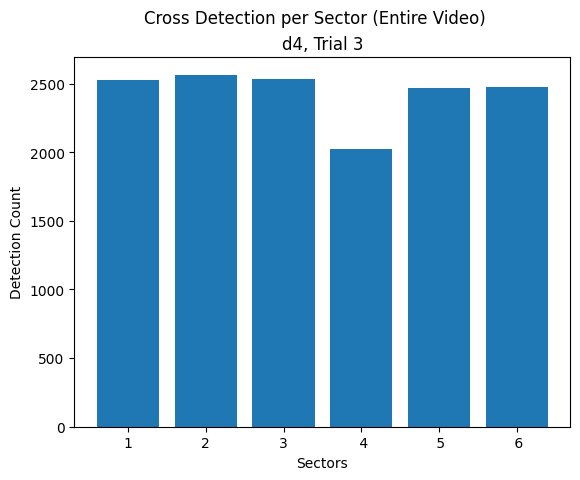

In [29]:
import matplotlib.pyplot as plt

# numbers for each sector are defined abvove

# Labels for the bars
labels = ['1', '2', '3', ' 4', ' 5', ' 6']

# Values for the bars
data = [sector1, sector2, sector3, sector4, sector5, sector6]

# Create a bar chart
plt.bar(labels, data)

# Add labels and title
plt.xlabel('Sectors')
plt.ylabel('Detection Count')
plt.suptitle("Cross Detection per Sector (Entire Video)")
plt.title("d4, Trial 3")

plt.savefig('cross7_video_bar_chart.png')
plt.show()